### AI - CS4442 - Intro to Machine Learning
**Author:** Matthew Shubat 
**Date:** March 19/2019

#### Titanic Survival Prediction
In this project I will apply some of the machine learning topics that were introduced in class:
* Relevant Statistics
* Naïve Bayes
* Perceptron  

As my first data science project I aim to learn more about the data science process and gain practical skills.

I will be using several resources for learning the relevant tools and technologies as it is my first time using many of them. <br>
I will list these resources here:
* http://blog.kaggle.com/tag/video-series/
* https://learning.oreilly.com/library/view/hands-on-machine-learning/9781491962282/
* https://matplotlib.org
* https://pandas.pydata.org
* https://seaborn.pydata.org
* https://scikit-learn.org/stable/
* https://docs.scipy.org/doc/numpy/

#### Purpose
The sinking of the RMS Titanic was, as the article states, one of the most infamous tragedy's known to date. The purpose of this project is to gain insights into what factors played a large role in determining whether or not a given individual was likely to have survived the shipwreck.

#### High Level View
I will generally be following an outline similar to that listed in ["Hands-On Machine Learning with Scikit-Learn & TensorFlow"](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781491962282/)

1. Big Picture
2. Get the Data
3. Visualize the Data
4. Clean the Data
5. Testing and Tuning Models
6. Finalizing Submission

### 1. Big Picture

**Problem Type:** Supervised Classification Problem.

#### Survival Rate
The article states that 1506 out of the Titanic's 2224 passengers did not survive.

In [210]:
death_percent = 1506/2224*100
survival_percent = 100-death_percent
print("Death Rate = {:.2f}%".format(death_percent))
print("Survival Rate= {:.2f}%".format(survival_percent))

Death Rate = 67.72%
Survival Rate= 32.28%


With these simple calculations we can already see that it unlikely that you would survive on the titanic in terms of raw chance. This of course assumes that each person is given the same 32.28% chance of survival.  

Let's explore the Kaggle data and look at what individual factors influence the survival rate.

### 2. Get the Data

#### Import the relevant libraries

In [211]:
# Data analysis
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#### Read in the data

In [212]:
train = pd.read_csv("./titanic/train.csv")
test = pd.read_csv("./titanic/test.csv")

Lets look at the data and see what we have.

In [213]:
train.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


It appears that there are 11 features (since PassengerId gives no useful information)

We can also see the associated types of each feature:


| Feature      | Type       |
|--------------|------------|
| Survived     | bool (int) |
| Pclass       | int        |
| Name         | string     |
| Sex          | string     |
| Age          | float      |
| SibSp        | int        |
| Parch        | int        |
| Ticket       | string     |
| Fare         | float      |
| Cabin        | string     |
| Embarked     | string     |


In [214]:
print("\nDATA SHAPE: (row, column)")
print("-----------------------------------\n{}".format(train.shape))
print("-----------------------------------")


DATA SHAPE: (row, column)
-----------------------------------
(891, 12)
-----------------------------------


We can see from the shape of the data that there are **12 columns** and **891 rows** given in the training data. 

* There are 891 passengers in our training set

Let's use the describe() method to see some statistics of the data.

In [215]:
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Yasbeck, Mrs. Antoni (Selini Alexander)",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


As we can see using pandas describe() method. There are a few columns which have incomplete data: Namely **Age, Cabin, and Embarked**

* **Age** is 80.13% Complete (714/891), 19.87% Missing. It makes sense that age would be an important factor to surviving a shipwreck. So we will have to try something to use the values we have. 
* **Cabin** is 22.89% (204/891) complete, 87.11% Missing. Since this feature is missing so many of its values. I am not sure how it can be put to good use. May have to ignore it.
* **Embarked** has 889/891 of the values, thus is only missing .224% of its values which is not much.

In [216]:
# lets also look at the test data
test.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Brown, Mrs. John Murray (Caroline Lane Lamson)",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


As we can see here we are also missing 1 value from the "Fare" Feature in the test set as well as 86 values in the "Age" feature.

### 3. Visualize Data

Let's start by visualizing the various features with respect to survival to see if we notice any trends, patterns, or correlations.

#### Sex Feature

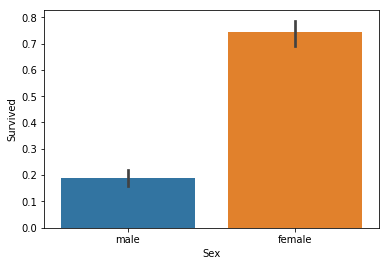

In [217]:
sns.barplot(x="Sex", y="Survived", data=train)

* Survival of Females was more likely than Males.
* This plot shows that ~20% of males survived vs. ~75% of females.
* It is also worth noting, from the previous table, that there were actually more men on the ship than women.  
 * 577 Men vs. 314 Women.
* The Sex Feature appears to be a **good indicator** of survival.
 
 
 #### Age Feature

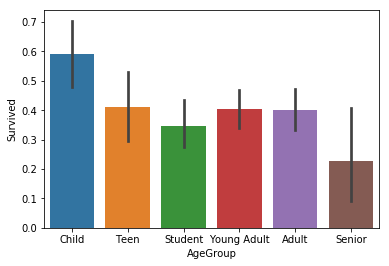

In [218]:
#bins = [10,15,25,35,55,75,130]
bins = [0, 13, 18, 24, 35, 60, 150]
labels = ['Child', 'Teen', 'Student', 'Young Adult', 'Adult', 'Senior']

train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)

#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()
#sns.barplot(x="Age", y="Survived", data=train)

* This seems to indicate that survival of the youngest was preffered or prioritized on the ship.
* As we can see, the group "Child" has the highest rate of survival, followed by the group "Teen".
* Whereas the lowest survival rate occurs among the group "Senior".
 
* The Age Feature appears to be a **good indicator** in predicting survival.

/Users/matt/Dropbox/Documents/University/Year 6/CS4442 - Artificial Intelligence/Assignments/A2/venv/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/matt/Dropbox/Documents/University/Year 6/CS4442 - Artificial Intelligence/Assignments/A2/venv/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

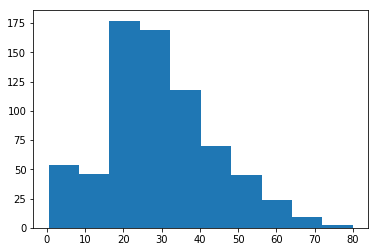

In [219]:
plt.hist(train["Age"])

Here we can see that the most common/likely age range is about 16 - 30


#### Pclass Feature
* 1 for 1st class 
* 2 for 2nd class
* 3 for 3rd class

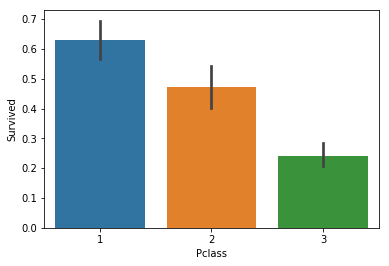

In [220]:
sns.barplot(x="Pclass", y="Survived", data=train)

We can see a pretty clear trend here that the "higher" the class of the passengers on the ship the more likely they were to survive.
* 1st class passengers has an ~63% survival rate 
* 2nd class passengers had an ~48% survival rate
* 3rd class passengers had an ~25% survival rate

Thus is appears that the Pclass Feature is a **good indicator** of survival.

#### SibSp Feature
* This feature indicates the number of Siblings and Spouses a given individual has aboard the ship.

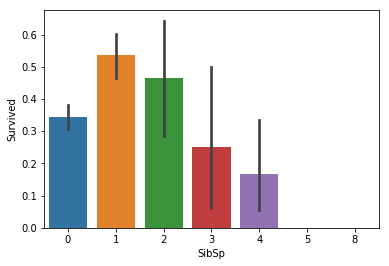

In [221]:
sns.barplot(x="SibSp", y="Survived", data=train)

* Looking at the data directly, it appears that the more siblings/spouses present on the ship the less likely your chance of survival.
 * This may be correlated with the fact that lower socioeconomic may be larger.
* Another point to note, having at least 1 or 2 siblings/parents aboard appears to be better than having none.
 * It appears having one or two sibling(s)/spouse aboard is helpful in aiding in survival wheras more of them leads to extra difficulty in surviving. 
 * This could also be due to a correlation with socioeconomic status.
 
 #### Parch Feature   <br>
 * Number of parents/children a given individual has on the ship.

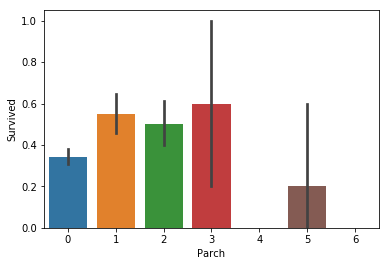

In [222]:
sns.barplot(x="Parch", y="Survived", data=train)

Observations:
* Individual with 4 or more parents/children onboard are less likely to survive.
* Individuals with 1-3 parents/children aboard are more likely to survive than those travelling alone.

#### Fare Feature
* This the passengers fare in British Pounds.

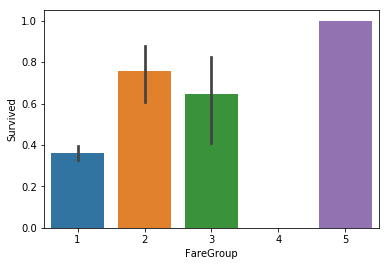

In [223]:
# replace missing entry in Fare with the mean value.
test = test.fillna({"Fare": 32})

labels = ['1', '2', '3', '4', '5']

train['FareGroup'] = pd.cut(train["Fare"], 5, labels = labels)
test['FareGroup'] = pd.cut(test["Fare"], 5, labels = labels)

#draw a bar plot of Fare vs. survival
sns.barplot(x="FareGroup", y="Survived", data=train)
plt.show()

* Similar to the Pclass feature, we can see that the more expensive the Fare, the more likely an individual was to survive
* Estimation of the Fare with the mean is not the most accurate but may not be too bad.

#### Embarked Feature
* Port of Embarkation

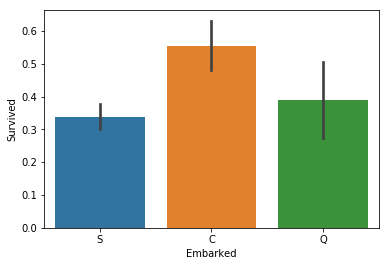

In [224]:
sns.barplot(x="Embarked", y="Survived", data=train)

* It appears that passengers who embarked on port C had a greater change of surviving than those who embarked on ports S and Q
 * Port C: ~55% survival
 * Port S: ~35% survival
 * Port Q: ~40% survival

### 4. Data Cleaning

Lets now try to deal with missing and odd values present in the train and test data.  

We will go through each Feature one by one and make sure it is good for both training and testing use.  


In [225]:
# Lets take a look at the test data now.
test.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FareGroup
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,418.000000,91,418,332,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,6,4
top,NaN,NaN,"Brown, Mrs. John Murray (Caroline Lane Lamson)",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,Young Adult,1
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,96,387
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.618511,NaN,NaN,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.840782,NaN,NaN,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN,NaN,NaN


* We have 418 passengers  in the test set.
* We are again missing values from Age and Cabin.
* Additionally Fare is missing an entry.

In [226]:
# Lets look at the Train set again
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FareGroup
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889,714,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3,6,4
top,NaN,NaN,NaN,"Yasbeck, Mrs. Antoni (Selini Alexander)",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S,Young Adult,1
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644,220,838
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN,NaN,NaN


#### Pclass
* No visible issues with Pclass

#### Name
* No visible issues with Name

Though may be a useful proxy for other information, we will drop for ease of model. If time may revisite.

In [227]:
train = train.drop(["Name"], axis=1)
test = test.drop(["Name"], axis=1)

#### Sex
Sex is currently formatted as a string. Lets turn change this to and integer value.
* 0 - Male
* 1 - Female 

In [228]:
gdict = {"male":0,
         "female":1,
         0:0, # just in case code is re-run
         1:1}
train["Sex"] = train["Sex"].map(gdict)
test["Sex"] = test["Sex"].map(gdict)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FareGroup
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,Student,1
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,Adult,1
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,Young Adult,1
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,Young Adult,1


#### Age
* As previously mentioned age is missing ~20% of its values from the training set.
* Similarly, the test set is missing ~20% of its age values.  
Lets try fill in these missing values with something reasonable.
For now, lets just use the mean age. *Not the best estimate, there is likely a better alternative but it may not be too bad for now*

In [229]:
train["Age"] = train["Age"].fillna(30)
test["Age"] = test["Age"].fillna(30)
train.describe(include="all")

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FareGroup
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891,891.000000,204,889,714,891
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,681,NaN,147,3,6,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S,Young Adult,1
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,4,644,220,838
mean,446.000000,0.383838,2.308642,0.352413,29.758889,0.523008,0.381594,NaN,32.204208,NaN,NaN,NaN,NaN
std,257.353842,0.486592,0.836071,0.477990,13.002570,1.102743,0.806057,NaN,49.693429,NaN,NaN,NaN,NaN
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,NaN,7.910400,NaN,NaN,NaN,NaN
50%,446.000000,0.000000,3.000000,0.000000,30.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,NaN
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN,NaN,NaN


Now we need to also re-create AgeGroup

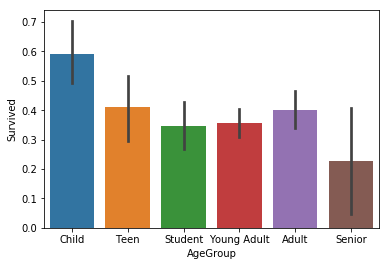

In [230]:
bins = [0, 13, 18, 24, 35, 60, 150]
labels = ['Child', 'Teen', 'Student', 'Young Adult', 'Adult', 'Senior']

train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)

#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()

In [231]:
#Lets now map each AgeGroup to a numerical value
AgeGroup_mapping = {'Child':1,
                    'Teen':2,
                    'Student':3,
                    'Young Adult':4,
                    'Adult':5,
                    'Senior':6}

train['AgeGroup'] = train['AgeGroup'].map(AgeGroup_mapping)
test['AgeGroup'] = test['AgeGroup'].map(AgeGroup_mapping)

# Also lets drop Age as we can just use AgeGroup Now
train = train.drop(["Age"], axis=1)
test = test.drop(["Age"], axis=1)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FareGroup
0,1,0,3,0,1,0,A/5 21171,7.2500,NaN,S,3,1
1,2,1,1,1,1,0,PC 17599,71.2833,C85,C,5,1
2,3,1,3,1,0,0,STON/O2. 3101282,7.9250,NaN,S,4,1
3,4,1,1,1,1,0,113803,53.1000,C123,S,4,1
4,5,0,3,0,0,0,373450,8.0500,NaN,S,4,1


#### SibSp
* No visible issues with SibSp

**Parch**
* No visible issues with SibSp

**Ticket**
* The ticket class does not appear to provide much if any new information. The only thing I can see is it may correlate to socioeconomic status, but we already have Fare and Pclass for that. 
* So were are going to drop it for now.

In [232]:
train = train.drop(["Ticket"], axis=1)
test = test.drop(["Ticket"], axis=1)

#### Fare
* looks good, but we can use the FareGroup now. So we will drop Fare.


In [233]:
train = train.drop(["Fare"], axis=1)
test = test.drop(["Fare"], axis=1)

#### Cabin
* Previously we found that we were missing 87.11% of our cabin data from the training set. 
* We can now also see that we are missing 78.22% of the cabin data from the test set.
<br><br>
Given so much missing data, we are going to drop this feature from the model.

In [234]:
train = train.drop(["Cabin"], axis=1)
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,FareGroup
0,1,0,3,0,1,0,S,3,1
1,2,1,1,1,1,0,C,5,1
2,3,1,3,1,0,0,S,4,1
3,4,1,1,1,1,0,S,4,1
4,5,0,3,0,0,0,S,4,1


In [235]:
test = test.drop(["Cabin"], axis=1)
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,FareGroup
0,892,3,0,0,0,Q,4,1
1,893,3,1,1,0,S,5,1
2,894,2,0,0,0,Q,6,1
3,895,3,0,0,0,S,4,1
4,896,3,1,1,1,S,3,1


#### Embarked


In [236]:
print("# of people who embarked on S = {}".format(len(train[train["Embarked"]=="S"])))
print("# of people who embarked on C = {}".format(len(train[train["Embarked"]=="C"])))
print("# of people who embarked on Q = {}".format(len(train[train["Embarked"]=="Q"])))

# of people who embarked on S = 644
# of people who embarked on C = 168
# of people who embarked on Q = 77


Since the majority of people embarked on port S, we will fill the missing values with S.

In [237]:
# Replace the missing values in Embarked feature with S
train = train.fillna({"Embarked": "S"})
test = test.fillna({"Embarked":"S"})


train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,FareGroup
0,1,0,3,0,1,0,S,3,1
1,2,1,1,1,1,0,C,5,1
2,3,1,3,1,0,0,S,4,1
3,4,1,1,1,1,0,S,4,1
4,5,0,3,0,0,0,S,4,1


In [238]:
# Map Embarked to a numerical value
embarked_mapping = {"S": 1,
                    "C": 2,
                    "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

In [239]:
# Check the train data
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,FareGroup
0,1,0,3,0,1,0,1,3,1
1,2,1,1,1,1,0,2,5,1
2,3,1,3,1,0,0,1,4,1
3,4,1,1,1,1,0,1,4,1
4,5,0,3,0,0,0,1,4,1


In [240]:
# Check the test data
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,FareGroup
0,892,3,0,0,0,3,4,1
1,893,3,1,1,0,1,5,1
2,894,2,0,0,0,3,6,1
3,895,3,0,0,0,1,4,1
4,896,3,1,1,1,1,3,1


In [241]:
# Should print False for Both.
print(test.isnull().values.any())
print(train.isnull().values.any())

False
False


### 5. Testing and Tuning Models

In [242]:
from sklearn.model_selection import train_test_split

predictors = train.drop(['Survived', 'PassengerId'], axis=1)
t = train["Survived"]
X_train, X_val, Y_train, Y_val = train_test_split(predictors, t, test_size = 0.2, random_state = 0)

#### Models

These are the models tested on the data.

* Gaussian Naive Bayes
* Perceptron
* Logistic Regression

I will try using the common 80:20 split for testing the results.

In [243]:
# hide Future Warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

First we just hide the "FutureWarnings"

In [244]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_val)
acc_gaussian = round(accuracy_score(Y_pred, Y_val) * 100, 2)
print(acc_gaussian)

78.77


In [245]:
# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_val)
acc_perceptron = round(accuracy_score(Y_pred, Y_val) * 100, 2)
print(acc_perceptron)

77.09


In [246]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_val)
acc_logreg = round(accuracy_score(Y_pred, Y_val) * 100, 2)
print(acc_logreg)

79.33


In [247]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, Y_train)
Y_pred = decisiontree.predict(X_val)
acc_decisiontree = round(accuracy_score(Y_pred, Y_val) * 100, 2)
print(acc_decisiontree)

79.33


In [248]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(X_train, Y_train)
y_pred = randomforest.predict(X_val)
acc_randomforest = round(accuracy_score(Y_pred, Y_val) * 100, 2)
print(acc_randomforest)

79.33


In [249]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_val)
acc_knn = round(accuracy_score(Y_pred, Y_val) * 100, 2)
print(acc_knn)

79.89


In [252]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(X_train, Y_train)
Y_pred = gbk.predict(X_val)
acc_gbk = round(accuracy_score(Y_pred, Y_val) * 100, 2)
print(acc_gbk)

83.24


It appears The Gradient Boosting classifier is the most accurate for the way my data was organized.    
I will proceed with it.

### 6. Finalizing the Submission

Now I will create the submission file for the kaggle test set provided.

In [253]:
#set ids as PassengerId and predict survival 
ids = test['PassengerId']
predictions = gbk.predict(test.drop('PassengerId', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission.csv', index=False)